# An Analysis of Sport & Exercise Facility Locations in Glasgow

## Introduction

The Health & Fitness industry is currently one of the fastest growing industries in the world. A 2019 report by Deloitte called on the European Health & Fitness Market (https://www2.deloitte.com/content/dam/Deloitte/es/Documents/acerca-de-deloitte/Deloitte-ES-TMT-European-Health-Fitness-Market-2019.pdf) showed that there were 62.2 million members of fitness clubs, an increase in memberships of 3.5% that year, resulting in a 1.2% growth in the market and a total revenue of EUR 27.2 billion in 2018.

I am from the UK, the second largest market in Europe after Germany with 9.9 million people being members of fitness clubs, almost one fifth of the entire European market. It is becoming more and more common to see gyms/fitness studios opening around the country but they tend to be large companies such as Puregym who are currently leading the UK fitness market with 1.01 million members. I live in Glasgow, Scotland in a fairly upcoming and trendy area/neighborhood known for its restaurants and parks etc. making it a popular spot for students and young professionals to live in, but I have noticed that my nearest gym/fitness club is around a 30 minute walk away in a different area. The larger companies like Puregym tend to open in city centres and retail parks due to the space available in units and the large concentrations of people in those areas so it is unlikely that they will open in areas like mine just out of the city centre areas. This made me realise that there might be an opportunity for independent gyms and fitness clubs to open in areas like mine, maybe not quite to the scale of the market leading companies but can draw in members due to the location.

In particular I believe this might interest anyone looking to start a new business such as personal trainers looking for their own space as well as current business owners that might own their own independent gym/fitness club(s) that are looking to expand and grow their business. However it is also possible that it may help larger companies identify suitable areas for a new store by doing an analysis of the whole city.

## Data

For this project I will be looking at all the postcode areas for Glasgow (G). I will be obtaining these by scraping a Wikipedia page (https://en.wikipedia.org/wiki/G_postcode_area) using the BeautifulSoup package similarly to the assignment in week 3. Specifically I will be scraping all of the table in the Figure below and reading it into a pandas dataframe.

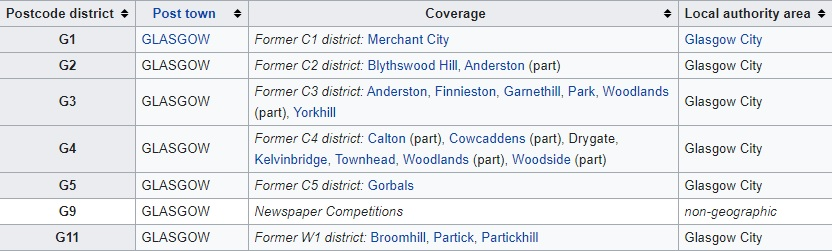

The next step would be to clean this data, starting with removing all the non-geographic postcodes as they do not physically exist e.g. G9. Next we can choose only to include the Post towns in Glasgow as we are only interested in the neighborhoods/areas (Coverage) that are considered part of the city of Glasgow itself, this would also mean that the column Post town is no longer necessary as all cells will be "GLASGOW", therefore it can also be removed. Finally, in the Coverage column there are unnecessary substrings that can be removed e.g. "Former C1 district" and the neighborhooods/areas can be split into individual rows, rather than as a comma separated list. It might also be worth changing the column name Coverage to Neighborhood/area for easier understanding but it doesn't really matter.

In order to utilise the Foursquare location data, the coordinates (latitude & longitude) of each Postcode district is required. These can be obtained from https://www.freemaptools.com/download-uk-postcode-lat-lng.htm and read into their own Pandas dataframe and then merged on Postcode district with the main dataframe. It may also be of use to obtain the coordinates for Glasgow using the geocoder class Nominatim from the Geopy client and visualise Glasgow and its neighborhoods/areas on a folium map before the Foursquare location data is utilised.

The Foursquare location data will be used to obtain gyms/fitness clubs in each neighborhood/area. This data can then be used to cluster the neighborhoods/areas in glasgow and visualise on a map for further analysis. Shapefiles of UK postcode boundary polygons are available from https://www.opendoorlogistics.com/downloads/ and can be converted to a geojson file using https://mapshaper.org/ for use in creating a choropleth map also.

## Methodology

The first step was to gather the required data on the Glasgow postcode areas (G), this was done by scraping the wikipedia page https://en.wikipedia.org/wiki/G_postcode_area#Coverage using the BeautifulSoup package to parse the HTML, running a FOR loop to retrieve all the rows of the table containing the data and then the returned list was converted into a pandas dataframe. The resulting dataframe needed a bit of cleaning as it had some irrelevant or unuseful data as well being in the incorrect format or containing unwanted characters/symbols.

Next the coordinates of the postcodes had to be sourced. These were taken from https://www.freemaptools.com/download-uk-postcode-lat-lng.htm and read in to a new dataframe called 'coord'. This file contained information for every postcode district in the UK so all the other postcodes had to be dropped from the dataframe. As well as this there was an unuseful column that was dropped and the columns were renamed to match the other dataframe so they could then be merged on the column 'Postcode district' using an inner join. The resulting dataframe 'df1' contained data on all G postcodes, some of which were not in the city of Glasgow so were of no interest to us for this project as well as some non-geographic postcodes that didn't physically exist so they were dropped. The neighborhoods/areas were given as lists for each postcode so they were separated out into individual rows using chain from the itertools package. All that remained was to now clean this dataframe up and sort it by Postcode district. The first 5 rows of the final dataframe can be seen below.

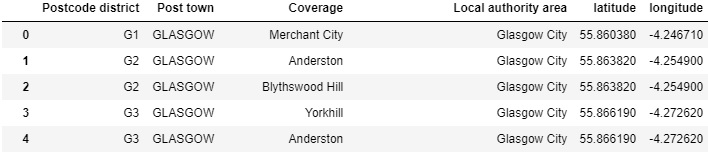

At this point it was useful to visualise the data in this dataframe. To do this required the use of the Nominatim tool to retrieve the coordinates of the city of Glasgow first and then using Folium maps to display each Coverage area on a map of Glasgow, which can be seen below.

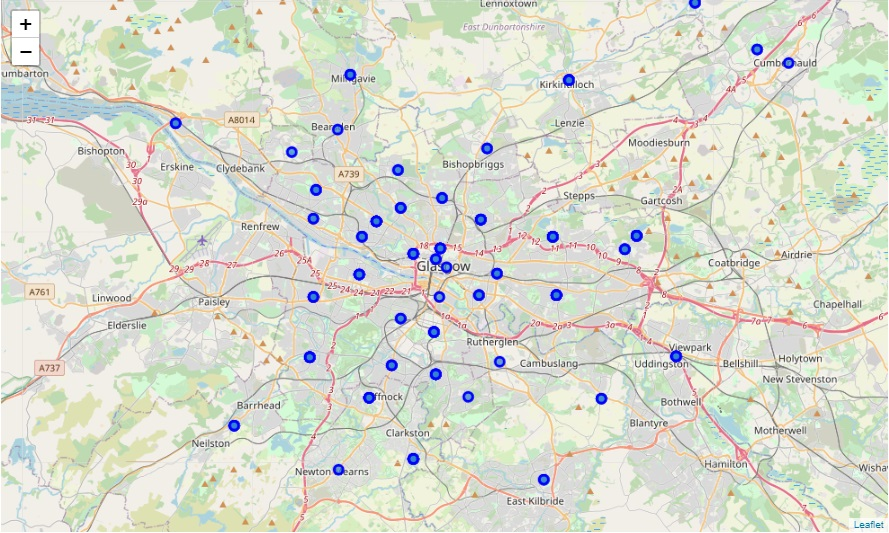

To locate the Gyms/Fitness clubs, Foursquare location data with "Gym" as a search query was used in a function to return the names and coordinates of up to 100 venues within a 1km radius of each Coverage area visualised on the above map. This data was then stored in a dataframe called glasgow_gyms. One hot encoding was then used to tally the number of each type of gym or sports venue for each area, i.e. Gym, Soccer Field, Yoga Studio. This data was then grouped by the area/neighborhood and the mean frequencies of venues were calculated in order to see which type of venues were the most common. A function was required to sort these in descending order so a new dataframe called neighborhoods_venues_sorted could be made, containing the top 5 venues for each coverage area/neighborhood. 

At this point the data was ready to be clustered (once the neighborhood column was dropped). K-means was ran on it with the number of clusters set at 5 and the resulting dataframe was merged with the original (df1) into a new dataframe called glasgow_merged containing all the information on each coverage area, the top 5 most common venues in each and the cluster labels, the cluster each area belongs to. This dataframe can be seen below. The final step was to visualise the clusters on a map, similarly to before, except each cluster was assigned a different colour and the markers display the Neighborhood, cluster number and the most common venue.

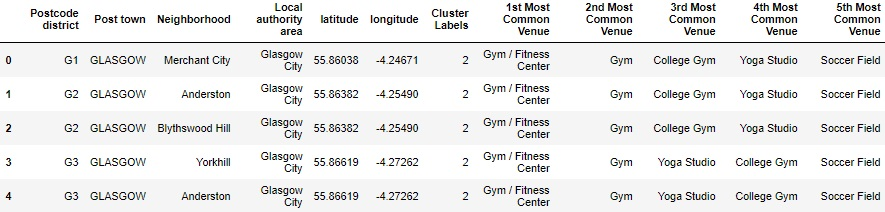

Finally, it was of use to visualise specifically the number of venues in each postcode district so as to obtain a better understanding of the clusters. To do this, each column of the one hot encoding dataframe had to be summed, merged with the glasgow_merged dataframe used to create the clusters (dropping unnecessary columns i.e. most common venues) and grouped by postcode district, latitude, longitude, cluster labels and summed on the venues. The resulting dataframe was called glasgow_totals. A choropleth map was decided as the best way to visualise this data but to create a choropleth map, a geojson file containing multiple coordinates that define the shape of the postcode boundaries is required. Using the shapefiles of UK postcode boundary polygons that were downloaded from https://www.opendoorlogistics.com/downloads/ it was possible to convert these into a geojson file using https://mapshaper.org/ and filtering to obtain only the G postcode boundaries. This file could then be downloaded into the workbook, reading it as a raw string in order for it to be used to create a choropleth map of glasgow, with each postcode district shaded differently depending on the number of gyms/sports venues in that area.

## Results

Below, the result of visualising the clusters on a folium map.

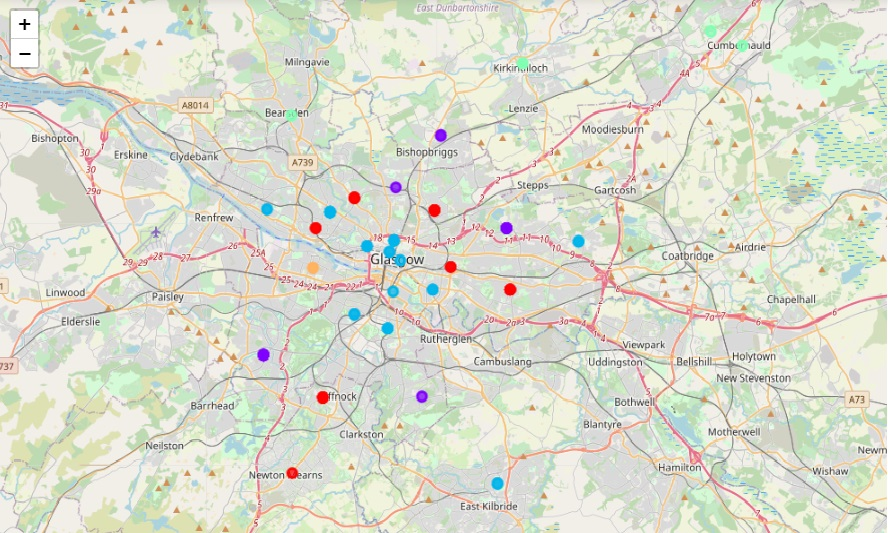

It can be seen from the map that the clusters are more densely packed at the city centre as you would expect, a larger concentration of people in that area will result in more venues. The majority, if not all clusters around the city centre belong to cluster 2 (light blue) meaning not only are they similar in terms of the number of venues in the area but also the types of venues in these areas are similar. This can be seen in the previous figure of the glasgow_merged dataframe, note how the first few postcode districts (G1-3) in and around the city centres top 5 most common venues are almost identical. There are a couple of cluster markers belonging to cluster 2 further out also, note East Kilbride in the bottom right, although it is considered part of Glasgow it is quite far out and is basically a town in itself. Therefore you would expect it to have a large number of venues and for the most common to be similar to the city centre.

If we look at cluster 3 (light green), these markers are all in smaller commuter towns on the edge of the city. They all share college gym as their most common venue, which is not surprising given their size and the fact that these areas are the most common places to locate schools and college campuses due to the space available and how popular these areas are for families to live in. 

Cluster 4 (orange) south west of the city centre is the smallest cluster, this is likely due to the type of venues in this area. We can see that the most common is climbing gym, venues such as this take up a large amount of space but need to be fairly close to cities to attract people as for most they are not a frequent visit. This area is quite industrial with a lot of large units and space which would explain this.

Cluster 0 (red) is mostly located close around the edge of the city centre in quieter, built-up residential areas, meaning there will be less venues in these areas. The most common venue appears to be gym rather than gym/fitness centre like in the nearby city centre, this is probably due to lack of space for larger fitness centres.

Finally, cluster 1 (purple) tends to be located on the edge of what can be considered the greater glasgow area. The most common venue is gym/fitness centre, similar to cluster 2 in the city centre. This is likely due to the population in these areas still being quite high but there being more space available for larger venues.

Visualising the number of venues in each postcode area on a choropleth map to compare with clustering. As you can see, the number of venues clearly move from a high concentration in the city centre (red) to a lower concentration (Orange to yellow) the further away from the centre you go. It is worth noting that not all areas in this map were used in this analysis, therefore they will be null, particularly in the North-West region.

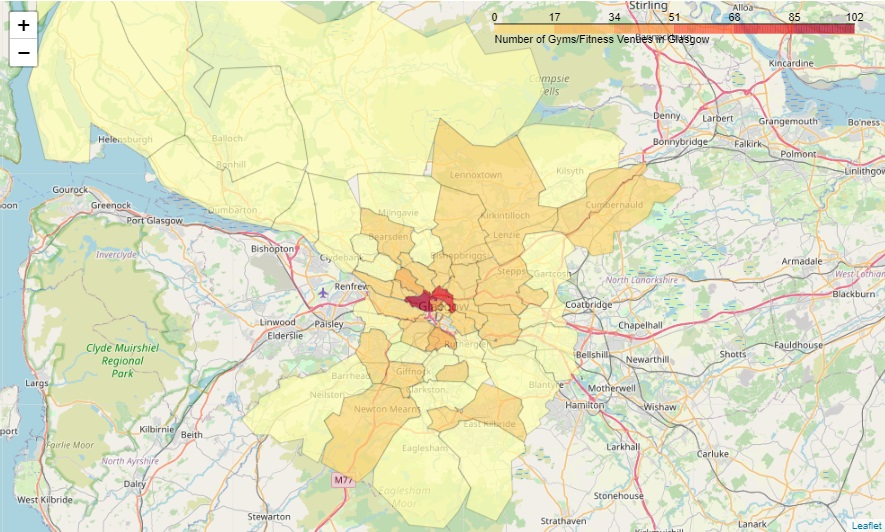

## Discussion

If we compare the clusters and the choropleth map we can see there are several areas that are lacking in either a number of facilities or certain types of facilities. These areas have been identified and highlighted in the map below. The closer to the city centre you go, the more likely you are to open a succesful business due to the greater number of people in close proximity, however it will limit the type of facility you are able to open due to limited space. These areas have been marked with a green dot, they include G13, G15, G23 and G62. Judging by other areas of similar geographical positions, the most popular facilities to open could be a gym, gym/fitness centre, yoga studio or sports pitch (football & rugby). The areas marked in green on the south side also have similar potential, these include G43, G44, G52, G73 and part of G72 (a large part of this postcode is rural but the inner part is not). 

There are a few other postcodes (marked with a red dot) further out of the city centre that may be of interest to a potential business owner. These are G65 and G69 in the North and G71, G75, G76 and G78 in the South. Some of these include small commuter towns where the most common venues tend to be pools and college gyms, therefore, there could be some potential here for regular gyms and gym/fitness centres. Due to some of these areas being mostly open space and main roads/motorways towards the city centre there could be potential for larger facilities like climbing gyms to be opened in business parks, which tend to have large units. These could draw in people from nearby towns who don't want to travel all the way into the city. 

Another area that might be worth noting is the position of cluster 4 in G51. The most common venue is a climbing gym but with such close proximity to the city centre and other populated residential areas there could be potential for a gym or gym/fitness centre.

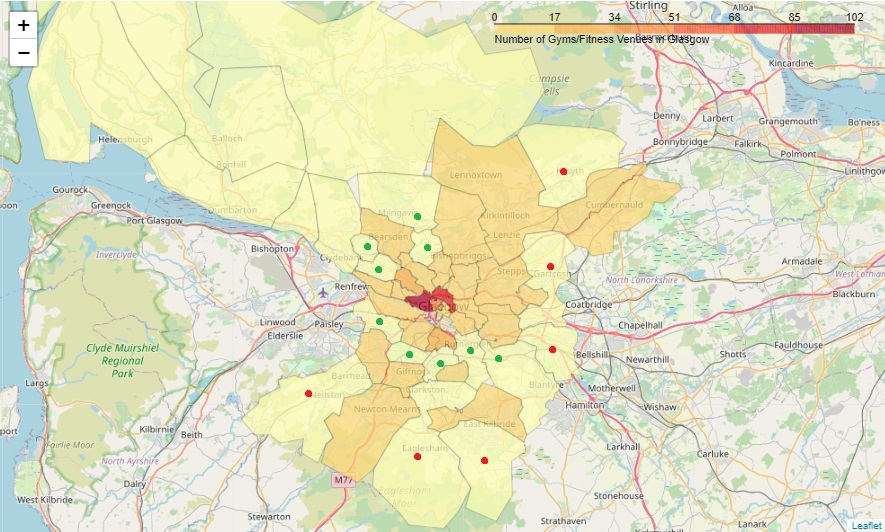

Obviously this was quite a brief study and there are many ways in which it could be improved or elaborated on. The only information provided about the venues was their type, allowing the most common venues to be calculated. If we wanted to learn more about them then we might include their ratings, this could tell us that, although there is a high concentration of facilities in an area, they may be lacking in quality and that area may have potential to open a facility in to compete. It could be useful to visualise each venue on a map as individual points to see how spread out they are, allowing gaps to be identified that could be filled in each area. A useful statistic to include could be the population of each area. If an area has a larger population, then that is more potential customers. Finally, changing the search radius may give more accurate results when we peform clustering. For this study we set it to 1km but as you can see from the map, some areas are much larger than others, therefore this might not be the most accurate measurement.

The final point to add is about the number of k to choose for k-means. For this study we chose k=5 for convenience like in previous labs. However, there are methods for accurately choosing k that would certainly worth applying in this situation. In particular the elbow method, which calculates the sum of squared distances from every point to the centre of their cluster and plots these distances. The optimal k is the point at which the decrease in sum of squared errors slows (this looks like the point of an elbow on the plot). We should test several points either side of the elbow to see which works best for our data. An accurate k would result in more accurate clustering.

## Conclusion

We can conclude that the areas in Glasgow with the most potential for opening a gym/sports facility in lie just outside the city centre area where there are still a lot of people but the market is not oversaturated. We can also say that there is a certain potential in some outer city areas as well, more so for larger facilities due to availability of space and their potential to draw people from nearby towns. Finally, there is definite scope for further, more detailed analysis of these venues to paint a more accurate picture of what gyms/sports venues are already available, as well as room for improvement in the Machine Learning methods used.